## Linear Regression
Predicting overnight stay in Berlin at Airbnb

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random

#Make results reproducible
np.random.seed(400)
random.seed(400)

### Load data

In [26]:
Berlin = pd.read_csv('data/Berlin/tomslee_airbnb_berlin_1471_2017-07-21.csv')

In [27]:
Berlin.shape

(21864, 20)

In [28]:
Berlin.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,7935870,1471,41848444,Shared room,NaN,Berlin,NaN,Mitte,0,0.0,3,1.0,NaN,71.0,NaN,Moabiter Schlummermutter,2017-07-25 07:33:11.130011,52.524177,13.333871,0101000020E6100000672AC423F1AA2A405F28603B1843...
1,18339755,1471,2310164,Shared room,NaN,Berlin,NaN,Charlottenburg-Wilmersdorf,0,0.0,2,1.0,NaN,70.0,NaN,QUIET HIDEAWAY IN GORGEOUS NEIGHBOURHOOD,2017-07-25 07:33:11.126913,52.501426,13.304605,0101000020E61000006B65C22FF59B2A409BAE27BA2E40...
2,8135806,1471,21857190,Shared room,NaN,Berlin,NaN,Charlottenburg-Wilmersdorf,0,0.0,1,1.0,NaN,72.0,NaN,Hotel Pension Messe Estimated 1 bed,2017-07-25 07:33:11.118463,52.506546,13.291830,0101000020E6100000BDFBE3BD6A952A40B6F5D37FD640...
3,16610057,1471,99254090,Shared room,NaN,Berlin,NaN,Pankow,0,0.0,2,1.0,NaN,78.0,NaN,Gemütliche 1-Zimmerwohnung,2017-07-25 07:33:11.116341,52.534989,13.425347,0101000020E610000047E7FC14C7D92A40215C01857A44...
4,4718249,1471,7908994,Shared room,NaN,Berlin,NaN,Mitte,0,0.0,3,1.0,NaN,72.0,NaN,Cozy central apartment,2017-07-25 07:33:11.113631,52.535720,13.396983,0101000020E6100000CD22145B41CB2A4014E813799244...


In [29]:
Berlin.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name',
       'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

### Data preparation

In [30]:
# Drop features which do not have data and not important at this time
Berlin = Berlin.drop(['country','city','last_modified','borough', 'location','bathrooms', 'minstay'], axis = 1)

# Also drop irrelavant information for now
Berlin = Berlin.drop(['room_id','survey_id', 'host_id', 'name'], axis = 1)
Berlin.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
0,Shared room,Mitte,0,0.0,3,1.0,71.0,52.524177,13.333871
1,Shared room,Charlottenburg-Wilmersdorf,0,0.0,2,1.0,70.0,52.501426,13.304605
2,Shared room,Charlottenburg-Wilmersdorf,0,0.0,1,1.0,72.0,52.506546,13.291830
3,Shared room,Pankow,0,0.0,2,1.0,78.0,52.534989,13.425347
4,Shared room,Mitte,0,0.0,3,1.0,72.0,52.535720,13.396983


In [31]:
Berlin.describe()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
count,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000,21864.000000
mean,13.452982,2.693492,2.682400,1.176866,69.829583,52.510324,13.406278
std,28.183697,2.352259,1.498732,0.654905,64.584770,0.030623,0.055657
min,0.000000,0.000000,1.000000,0.000000,10.000000,52.345803,13.107266
25%,1.000000,0.000000,2.000000,1.000000,38.000000,52.489249,13.377338
50%,4.000000,4.500000,2.000000,1.000000,57.000000,52.509565,13.416614
75%,12.000000,5.000000,3.000000,1.000000,82.000000,52.533536,13.439149
max,423.000000,5.000000,16.000000,10.000000,3006.000000,52.651670,13.721424


In [32]:
Berlin.isnull().sum()

room_type               0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
latitude                0
longitude               0
dtype: int64

### Exploratory data analysis (EDA) 

/Users/rajesh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


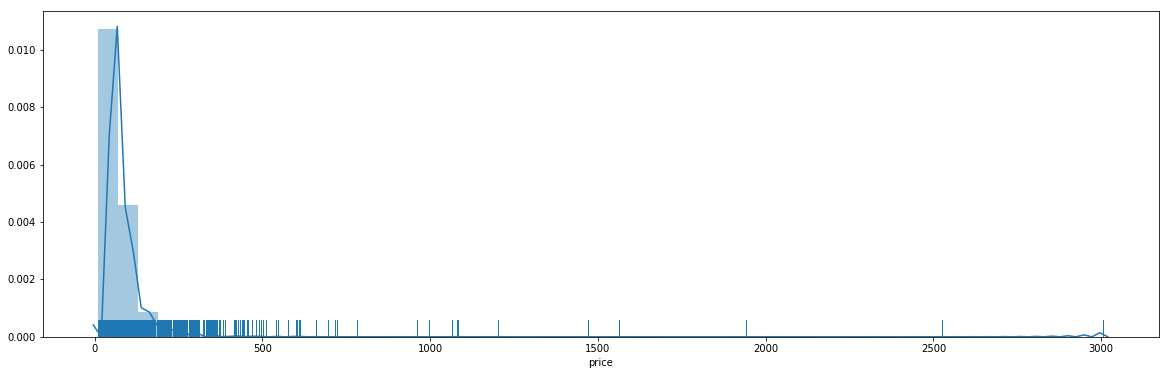

In [33]:
plt.figure(figsize=(20,6))
sns.distplot(Berlin['price'],rug=True)

### Questions:
1. How many different types of room?
2. Neighbourhoods in Berlin Airbnb?
3. Which room_type has higher price?

In [34]:
Berlin.room_type.unique()

array(['Shared room', 'Entire home/apt', 'Private room'], dtype=object)

In [35]:
sorted(Berlin.neighborhood.unique())

['Charlottenburg-Wilmersdorf',
 'Friedrichshain-Kreuzberg',
 'Lichtenberg',
 'Marzahn-Hellersdorf',
 'Mitte',
 'Neukölln',
 'Pankow',
 'Reinickendorf',
 'Spandau',
 'Steglitz-Zehlendorf',
 'Tempelhof-Schöneberg',
 'Treptow-Köpenick']

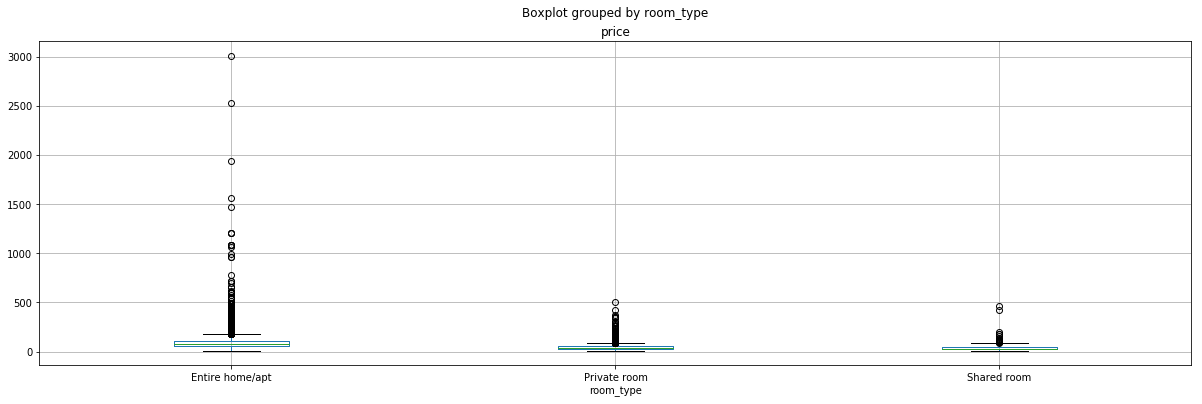

In [36]:
Berlin.boxplot(column = 'price', by = 'room_type', figsize=(20,6))

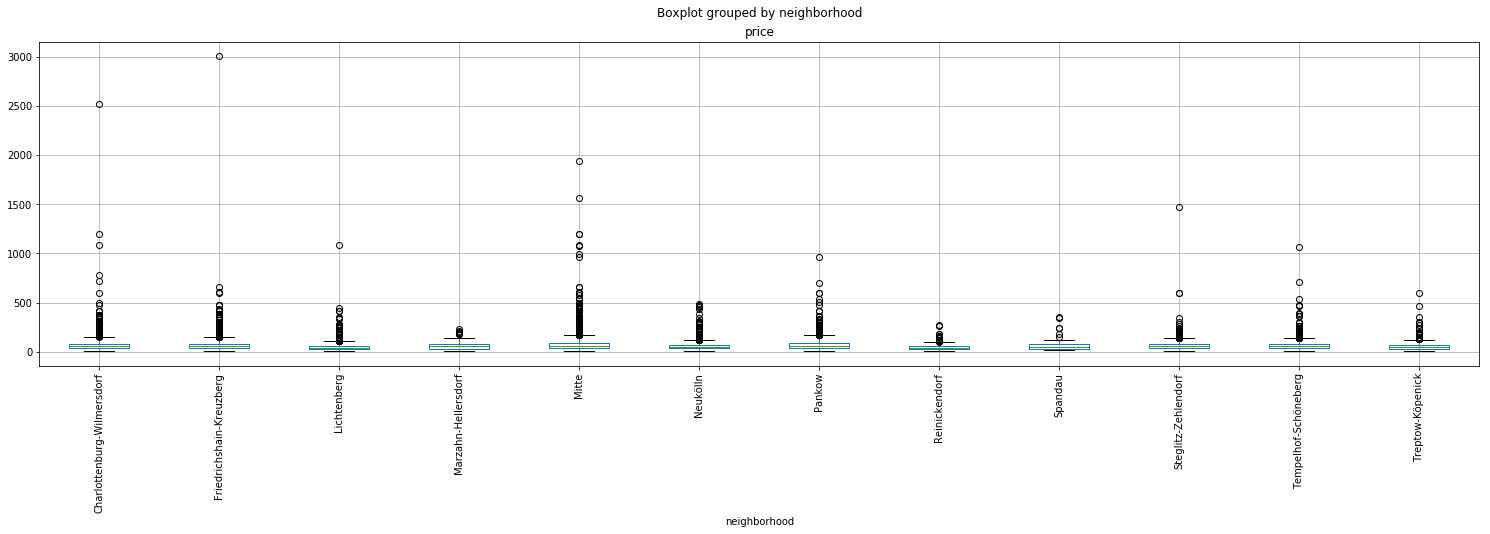

In [37]:
Berlin.boxplot(column='price', by='neighborhood', figsize=(25,6), rot=90);

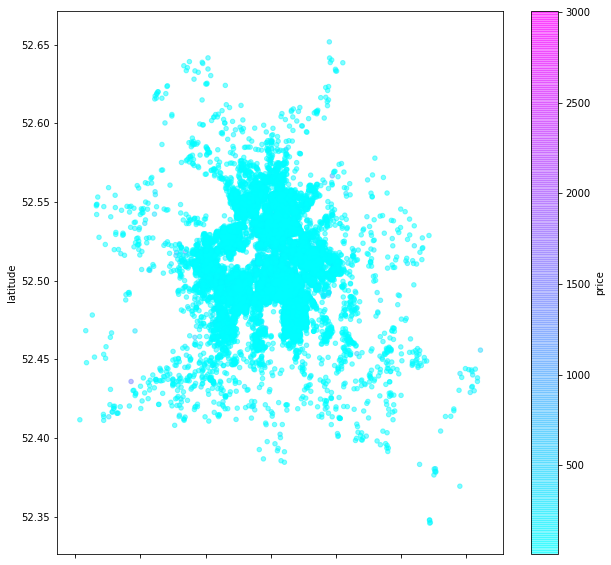

In [38]:
Berlin.plot.scatter(x='longitude', y='latitude', c = 'price', figsize=(10,10), cmap='cool', alpha=0.5)

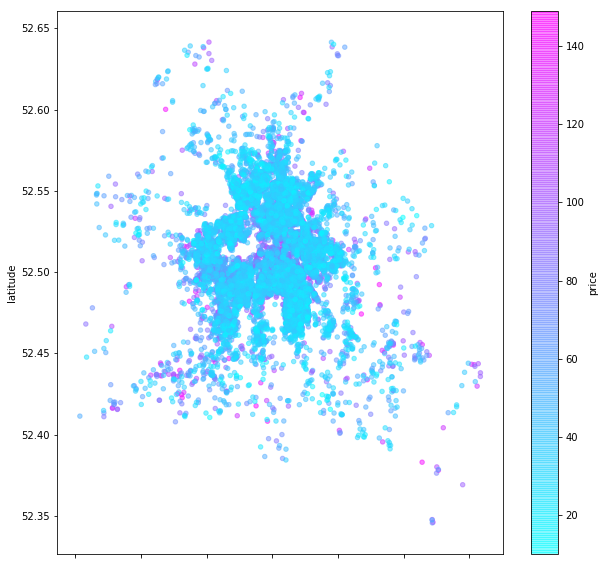

In [39]:
Berlin[Berlin['price']<150].plot.scatter(x='longitude', y='latitude', c = 'price', figsize=(10,10), cmap='cool', alpha=0.5)

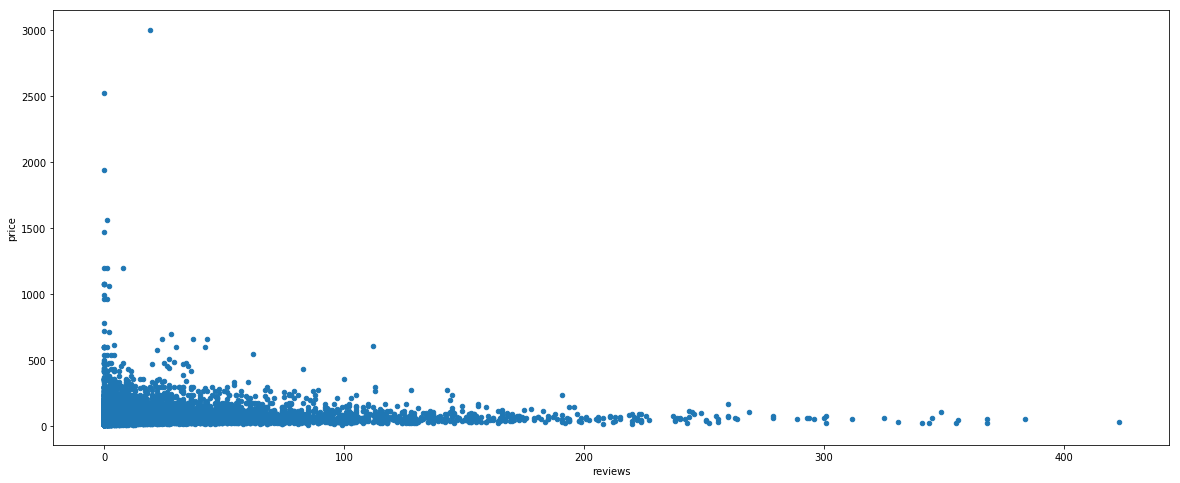

In [40]:
Berlin.plot.scatter(x='reviews', y='price',figsize=(20,8))

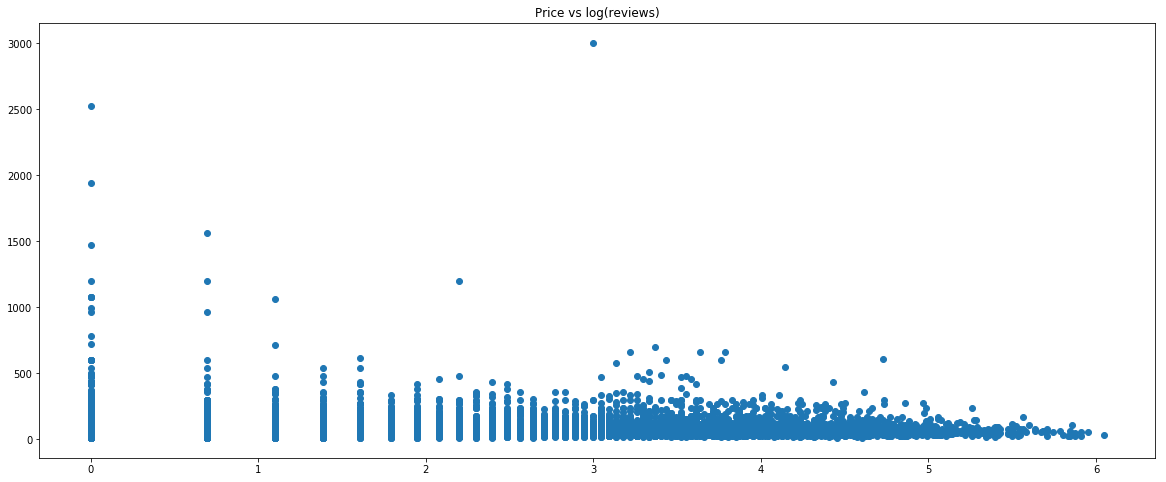

In [41]:
plt.figure(figsize=(20,8))
plt.scatter(np.log(1+Berlin['reviews']), Berlin['price'])
plt.title('Price vs log(reviews)');

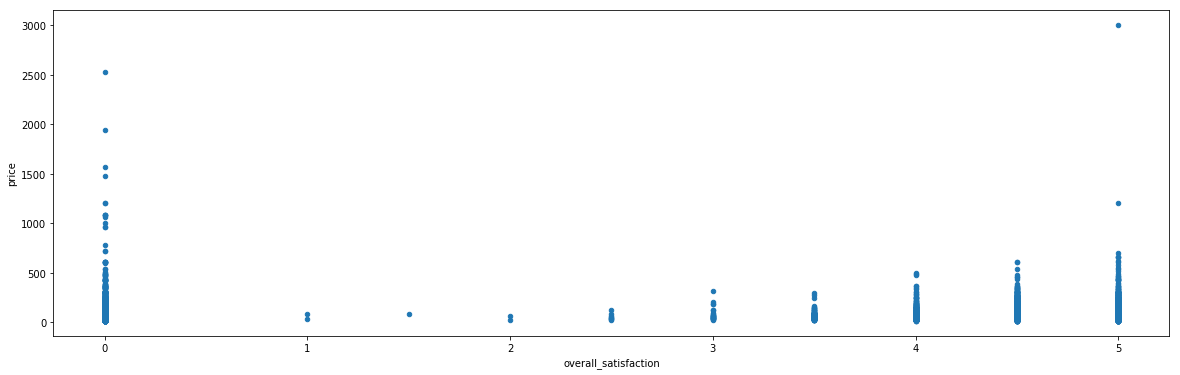

In [42]:
Berlin.plot.scatter(x='overall_satisfaction', y='price', figsize=(20,6))

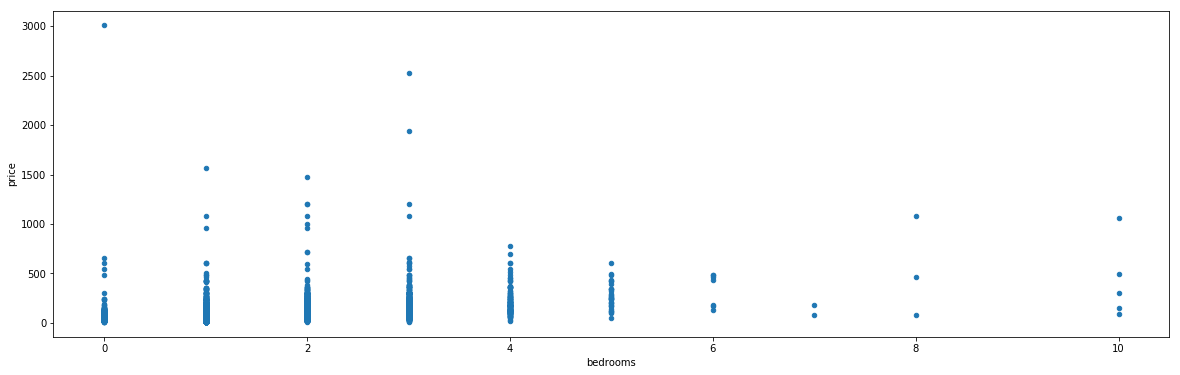

In [43]:
Berlin.plot.scatter(x='bedrooms', y='price', figsize=(20,6))

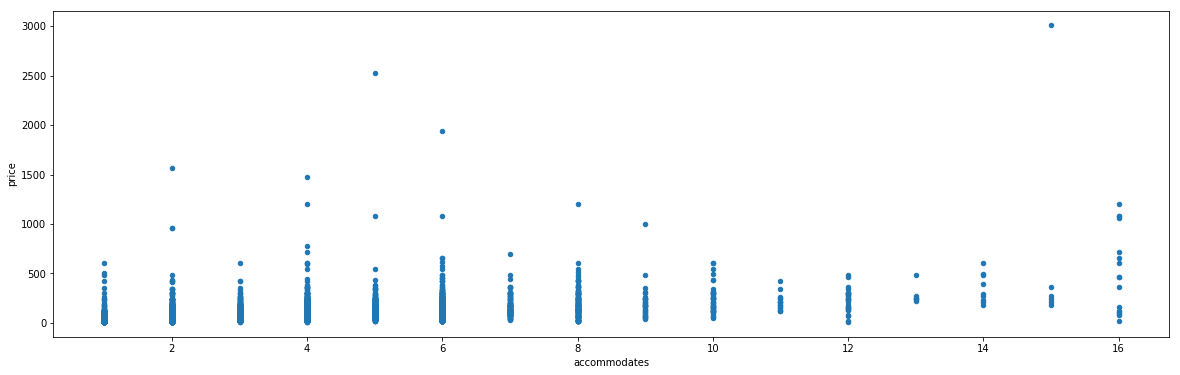

In [44]:
Berlin.plot.scatter(x='accommodates', y='price', figsize=(20,6))

### Feature Engineering

In [45]:
Berlin['logreviews'] = np.log(1 + Berlin['reviews'])
Berlin['bedrooms_per_accommodates'] = Berlin['bedrooms'] / Berlin['accommodates']

In [46]:
Berlin.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,logreviews,bedrooms_per_accommodates
0,Shared room,Mitte,0,0.0,3,1.0,71.0,52.524177,13.333871,0.0,0.333333
1,Shared room,Charlottenburg-Wilmersdorf,0,0.0,2,1.0,70.0,52.501426,13.304605,0.0,0.500000
2,Shared room,Charlottenburg-Wilmersdorf,0,0.0,1,1.0,72.0,52.506546,13.291830,0.0,1.000000
3,Shared room,Pankow,0,0.0,2,1.0,78.0,52.534989,13.425347,0.0,0.500000
4,Shared room,Mitte,0,0.0,3,1.0,72.0,52.535720,13.396983,0.0,0.333333


In [51]:
dataAirBnB = Berlin.copy()
print('Amount of orginal data: ' + str(len(dataAirBnB)))
dataAirBnB = dataAirBnB[dataAirBnB['reviews'] > 10]
print('Amount of data after removing "few reviews": ' + str(len(dataAirBnB)))

Amount of orginal data: 21864
Amount of data after removing "few reviews": 6127


In [52]:
# get dummies-onehot encoder to neighborhood
dataAirBnB = pd.get_dummies(dataAirBnB)
dataAirBnB.head()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,logreviews,bedrooms_per_accommodates,room_type_Entire home/apt,...,neighborhood_Lichtenberg,neighborhood_Marzahn-Hellersdorf,neighborhood_Mitte,neighborhood_Neukölln,neighborhood_Pankow,neighborhood_Reinickendorf,neighborhood_Spandau,neighborhood_Steglitz-Zehlendorf,neighborhood_Tempelhof-Schöneberg,neighborhood_Treptow-Köpenick
6,32,5.0,2,1.0,71.0,52.485371,13.406678,3.496508,0.5,0,...,0,0,0,0,0,0,0,0,0,0
16,21,5.0,1,1.0,42.0,52.512910,13.266674,3.091042,1.0,0,...,0,0,0,0,0,0,0,0,0,0
24,18,5.0,2,1.0,48.0,52.512189,13.264407,2.944439,0.5,0,...,0,0,0,0,0,0,0,0,0,0
28,20,4.5,2,1.0,42.0,52.550478,13.347277,3.044522,0.5,0,...,0,0,1,0,0,0,0,0,0,0
42,34,4.5,2,1.0,48.0,52.545653,13.409857,3.555348,0.5,0,...,0,0,0,0,1,0,0,0,0,0


In [57]:
X = dataAirBnB.copy().drop('price', axis =1)
y = dataAirBnB['price'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [58]:
scalar = StandardScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

### Baseline

In [60]:
lr = LinearRegression()
alphas = [1000,100,50,20,10,1,0.1,0.01]
l1_ratios = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
ridge = RidgeCV(alphas=alphas)
lasso = LassoCV(alphas=alphas, max_iter=10000)
elastic = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios)

In [65]:
for model, name in zip([lr,ridge, lasso,elastic], ['LinearRegression','Ridge','Lasso','ElasticNet']):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    
    y_pred = model.predict(X_test_scaled)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    best_alpha = ''
    if name != 'LinearRegression':
        best_alpha = ' best alpha: ' + str(model.alpha_)
    best_l1 = ''
    if name == 'ElasticNet':
        best_l1 == ' best l1: ' + str(model.l1_ratio_)
    print(name + ' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test) + best_alpha + best_l1)
    

LinearRegression mrse_train: 54.40720351258982, mrse_test: 41.16795553466665
Ridge mrse_train: 55.0862751523415, mrse_test: 40.05769654037639 best alpha: 1000.0
Lasso mrse_train: 54.717822409160696, mrse_test: 41.05398657805195 best alpha: 1.0
ElasticNet mrse_train: 54.72554761625359, mrse_test: 40.18911845170718 best alpha: 0.1


In [69]:
# Non-zero Lasso coefficients ordered by importance

        
order = np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
    coef_ = lasso.coef_[i]
    if coef_ > 0:
        print(X.columns[i] + ', ' + str(lasso.coef_[i]))

accommodates, 34.51594915475436
room_type_Entire home/apt, 15.205986109511057
bedrooms_per_accommodates, 7.156358165158357
overall_satisfaction, 6.632511236166653
neighborhood_Mitte, 3.9805513853592087
neighborhood_Friedrichshain-Kreuzberg, 1.5826233677984138
neighborhood_Pankow, 0.9594936516018403
bedrooms, 0.45002413281611753


### Error analysis

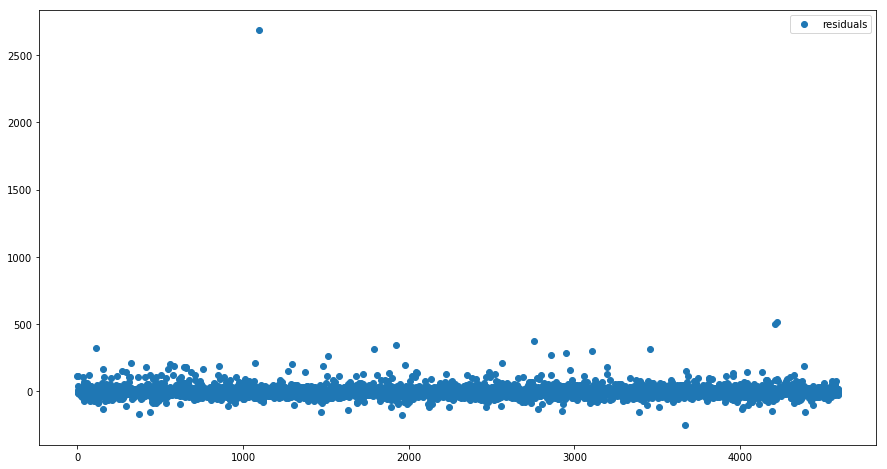

In [79]:
                      
y_pred_train = lasso.predict(X_train_scaled)
diff = y_train-y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)), diff, label = 'residuals')
plt.legend()

In [80]:
X_train[np.abs(diff>100)].describe()

,reviews,overall_satisfaction,accommodates,bedrooms,latitude,longitude,logreviews,bedrooms_per_accommodates,room_type_Entire home/apt,room_type_Private room,...,neighborhood_Lichtenberg,neighborhood_Marzahn-Hellersdorf,neighborhood_Mitte,neighborhood_Neukölln,neighborhood_Pankow,neighborhood_Reinickendorf,neighborhood_Spandau,neighborhood_Steglitz-Zehlendorf,neighborhood_Tempelhof-Schöneberg,neighborhood_Treptow-Köpenick
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.0,85.000000,85.000000,85.000000,85.0,85.0,85.0,85.000000,85.000000
mean,36.094118,4.829412,6.035294,2.400000,52.514985,13.410725,3.426693,0.427157,0.964706,0.035294,...,0.023529,0.0,0.388235,0.058824,0.223529,0.0,0.0,0.0,0.035294,0.023529
std,25.534115,0.262236,3.249348,1.355764,0.021721,0.054395,0.600038,0.143919,0.185617,0.185617,...,0.152477,0.0,0.490241,0.236691,0.419083,0.0,0.0,0.0,0.185617,0.152477
min,11.000000,4.000000,2.000000,0.000000,52.453524,13.214449,2.484907,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,19.000000,4.500000,4.000000,2.000000,52.497443,13.382128,2.995732,0.357143,1.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,28.000000,5.000000,6.000000,2.000000,52.515708,13.407438,3.367296,0.500000,1.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,46.000000,5.000000,7.000000,3.000000,52.532501,13.423681,3.850148,0.500000,1.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
max,143.000000,5.000000,16.000000,8.000000,52.555297,13.721424,4.969813,0.750000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000


In [81]:
high_error = X_train[np.abs(diff) > 80]
print('size high error: ' + str(len(high_error)))
low_error = X_train[np.abs(diff) < 10]
print('size low error: ' + str(len(low_error)))

size high error: 169
size low error: 1704


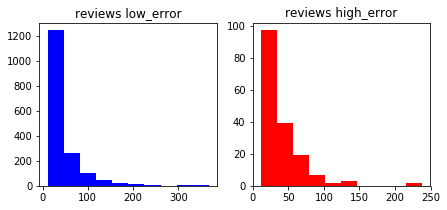

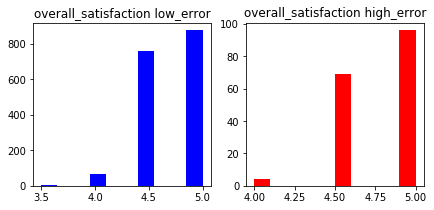

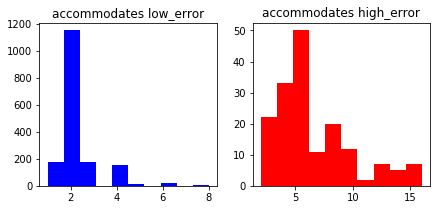

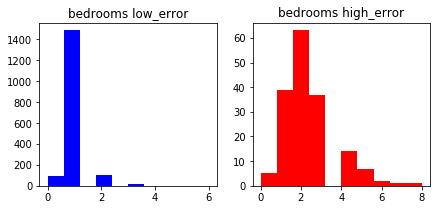

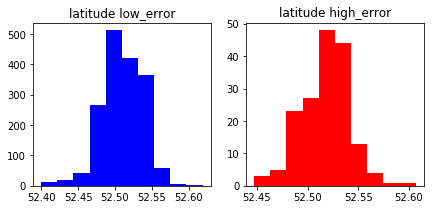

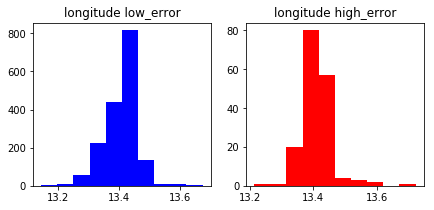

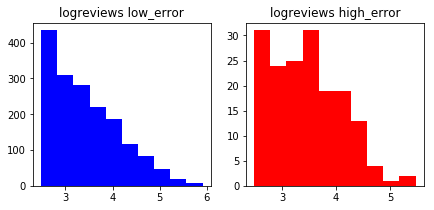

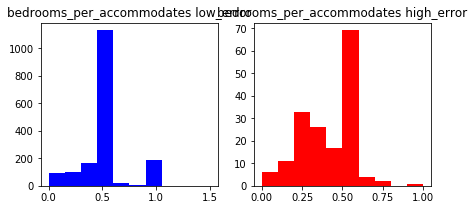

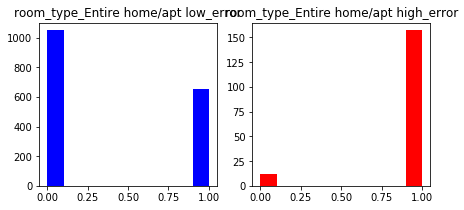

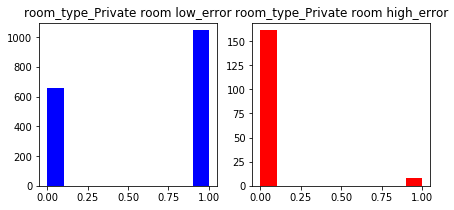

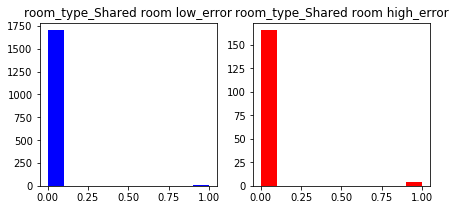

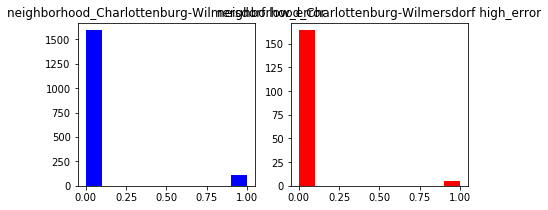

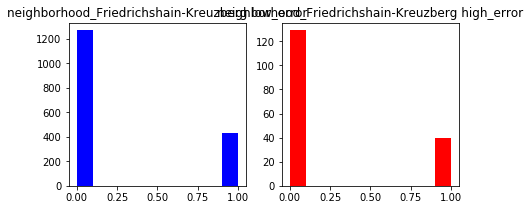

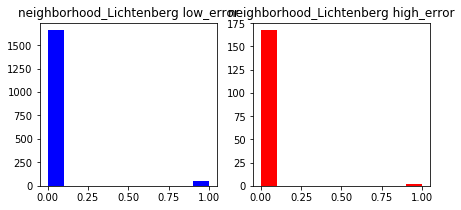

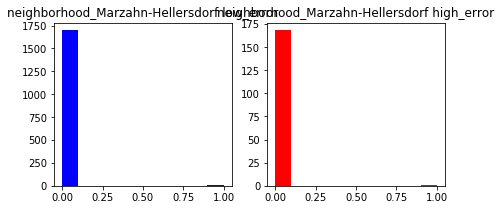

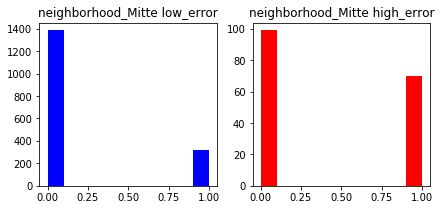

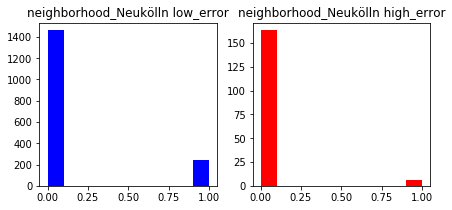

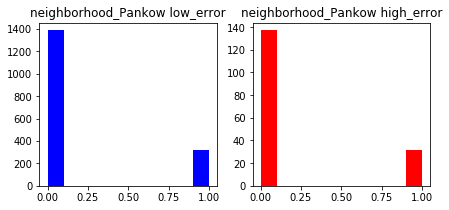

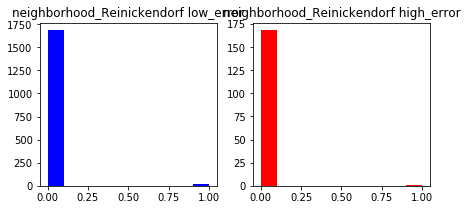

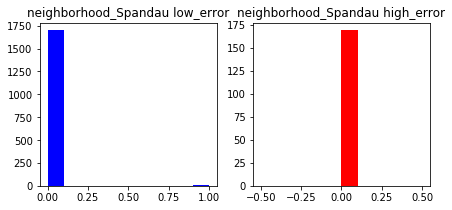

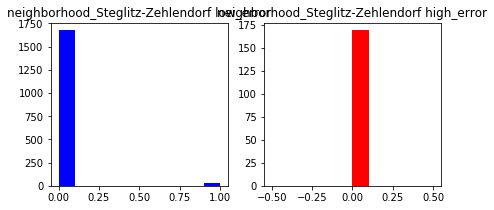

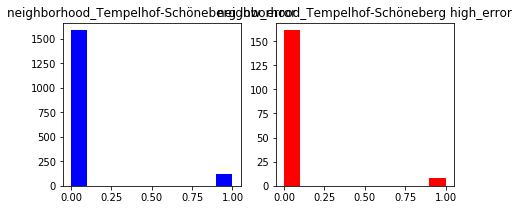

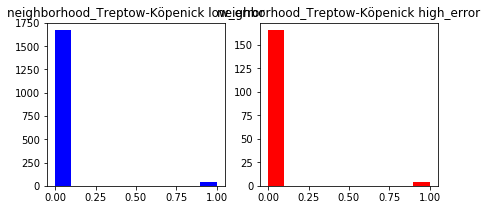

In [82]:
for c in high_error.columns:
    plt.figure(figsize=(7,3))
    plt.subplot(121)
    plt.hist(low_error[c], color='b')
    plt.title(c + ' low_error')
    plt.subplot(122)
    plt.hist(high_error[c], color='r')
    plt.title(c + ' high_error')
    plt.show()

p### polynomial regression

In [83]:
pf = PolynomialFeatures(degree=2)
pf.fit(X_train_scaled)
X_train_scaled = pf.transform(X_train_scaled)
X_test_scaled = pf.transform(X_test_scaled)

In [84]:
for model, name in zip([lr, ridge, lasso], ['LinearRegression', 'Ridge', 'Lasso']):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred = model.predict(X_test_scaled)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    print(name + ' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test))

LinearRegression mrse_train: 41.74804052510427, mrse_test: 46.996219877794914
Ridge mrse_train: 45.84036836504291, mrse_test: 42.46909804604726
Lasso mrse_train: 45.70972193902478, mrse_test: 43.505064911679085


In [85]:
poly_features = pf.get_feature_names(X_train.columns)

In [86]:
order = np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
    coef_ = lasso.coef_[i]
    if coef_ > 0:
        print(poly_features[i] + ', ' + str(lasso.coef_[i]))

room_type_Entire home/apt, 17.6268929813445
accommodates^2, 15.802240736888544
accommodates neighborhood_Friedrichshain-Kreuzberg, 13.945684884976648
bedrooms, 13.113218863730216
accommodates room_type_Entire home/apt, 8.232861664353198
accommodates bedrooms_per_accommodates, 7.809531915895289
bedrooms^2, 7.161873715648314
bedrooms_per_accommodates neighborhood_Friedrichshain-Kreuzberg, 6.6097068203046385
overall_satisfaction, 5.2768843132369865
longitude neighborhood_Mitte, 5.2033167118692
accommodates, 4.278361291397495
bedrooms latitude, 3.9064482598327577
neighborhood_Mitte^2, 2.820976061597602
bedrooms neighborhood_Mitte, 2.7077124681879554
overall_satisfaction accommodates, 2.673045151391343
accommodates neighborhood_Pankow, 1.9669482638973974
accommodates longitude, 1.8476897934652805
latitude neighborhood_Neukölln, 1.4218850937046432
bedrooms room_type_Entire home/apt, 1.2017902186736218
overall_satisfaction neighborhood_Friedrichshain-Kreuzberg, 0.9516326349106665
overall_sati